In [1]:
import serial
from ECi import ECipot
pot = ECipot()
from ec4py import EC_Data
import matplotlib.pyplot as plt
from ec4py import LSV_Data,LSV_Datas
from ECi_pot_serial_tech_step import tech_step_aquire, tech_step
import math
import numpy as np


In [11]:
class testFX:
    def __init__(self):
        self.index_max = 200
        self.tdata = np.array([i/100 for i in range(self.index_max)])
        self.Edata = self.tdata * 2+0.01
        self.idata = np.array([math.log(x) for x in self.Edata])
        self.index = 0
        self.sp_text =[]
        self.sp_index = []
        
        return
    
    def comFX(self):
        self.index = self.index + 1
        sp = next((x for x in self.sp_index if x == self.index) ,None)
        if sp is not None:
            print(len(self.sp_index))
            del self.sp_index[0]
            t = self.sp_text[0]
            del self.sp_text[0]
            self.index = self.index - 1
            return t
        if(self.index == self.index_max):
            return "Done"
        else:
            return f"\t{self.tdata[self.index]}\t{self.Edata[self.index]}\t{self.idata[self.index]}"
        
    def make_steps(self):
        self.sp_index = [5,50,100]
        self.sp_text = ["Start", "STEP ","STEP "]
        
    

In [16]:

a = testFX()
a.make_steps()
a.comFX()

'\t0.01\t0.03\t-3.506557897319982'

In [20]:
a = testFX()
a.make_steps()
tdata = tech_step_aquire(a.comFX)
print(tdata.Time())

	0.01	0.03	-3.506557897319982
	0.02	0.05	-2.995732273553991
	0.03	0.06999999999999999	-2.6592600369327783
	0.04	0.09	-2.4079456086518722
3
Start
---------------------------------------------2
---------------------------------------------------1
-----------------------------------------------------------------------------------------------------
Done
[0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18
 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32
 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46
 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6
 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74
 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88
 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02
 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16
 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3
 1.31 1.32 

	0.01	0.03	-3.506557897319982
	0.02	0.05	-2.995732273553991
	0.03	0.06999999999999999	-2.6592600369327783
	0.04	0.09	-2.4079456086518722
3
Start
---------------------------------------------2
---------------------------------------------------1
-----------------------------------------------------------------------------------------------------
Done


(<matplotlib.lines.Line2D at 0x1c43a4bfad0>,
 <Axes: xlabel='t ( s)', ylabel='i (A)'>)

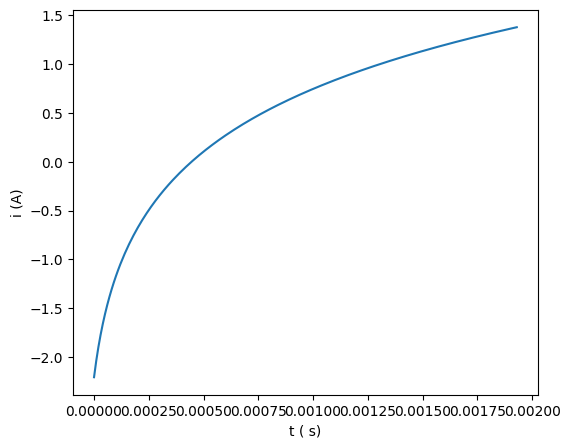

In [23]:
a = testFX()
a.make_steps()
data = tech_step(a.comFX)
data.plot()